# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [2]:
import pandas as pd

In [3]:
survey = pd.read_csv('kaggle_survey_2020_responses.csv', skiprows=[1])

In [4]:
survey_copy = survey.copy()

In [5]:
survey.drop('Time from Start to Finish (seconds)', axis=1, inplace=True)

In [6]:
survey.rename(columns={'Q1': 'Age', 'Q2': 'Gender', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Occupation', 'Q6': 'Coding Experience'}, inplace=True)

In [7]:
survey.dropna(subset=['Education', 'Occupation', 'Coding Experience'], inplace=True)
survey.reset_index(drop=True)

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19116,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19117,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19118,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [8]:
print('Silinen satır sayısı:', len(survey_copy) - len(survey))

Silinen satır sayısı: 916


In [9]:
print(f'Satır sayısı: {survey.shape[0]}\nSütun sayısı: {survey.shape[1]}')

Satır sayısı: 19120
Sütun sayısı: 354


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

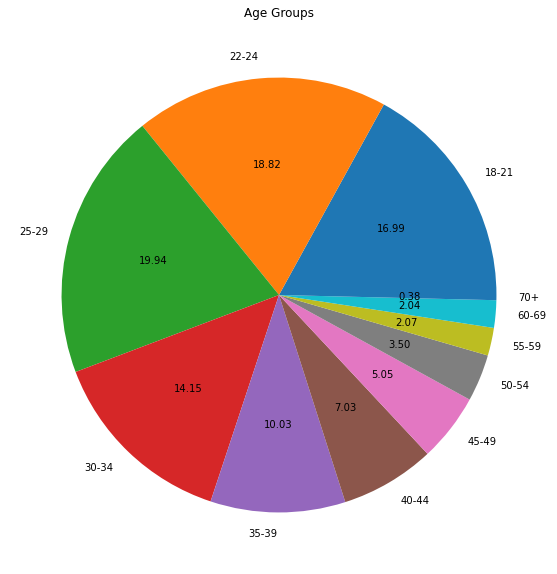

In [10]:
survey.groupby('Age').size().plot(kind='pie', autopct='%.2f', figsize=(10,10), title='Age Groups', ylabel='');

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [11]:
survey[survey['Country'] == 'Turkey']['Education'].value_counts()

Bachelor’s degree                                                    129
Master’s degree                                                      111
Doctoral degree                                                       50
Some college/university study without earning a bachelor’s degree     15
I prefer not to answer                                                 8
Professional degree                                                    6
No formal education past high school                                   3
Name: Education, dtype: int64

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [12]:
survey.groupby(['Age'])['Occupation'].apply(pd.Series.mode)

Age     
18-21  0           Student
22-24  0           Student
25-29  0           Student
30-34  0    Data Scientist
35-39  0    Data Scientist
40-44  0    Data Scientist
45-49  0             Other
50-54  0             Other
55-59  0             Other
60-69  0             Other
70+    0    Data Scientist
Name: Occupation, dtype: object

## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

In [13]:
q5 = survey.filter(regex='^Q7', axis=1)
q5.columns = q5.apply(pd.Series.mode).iloc[0]

In [14]:
q5_section1 =  q5.count().sort_values(ascending=False)
q5_section1

0
Python        15530
SQL            7535
R              4277
C++            3827
Java           3367
C              3315
Javascript     2995
MATLAB         2217
Other          1945
Bash           1776
Julia           262
None            206
Swift           198
dtype: int64

In [15]:
q5.insert(0, 'Occupation', survey.Occupation)
q5_dataScientists = q5[q5['Occupation'] == 'Data Scientist'].drop('Occupation', axis=1)

In [16]:
q5_section2 = q5_dataScientists.count().sort_values(ascending=False)
q5_section2

0
Python        2453
SQL           1473
R              975
Bash           405
C++            323
Java           305
Javascript     290
C              247
Other          245
MATLAB         242
Julia           71
Swift           14
None             5
dtype: int64

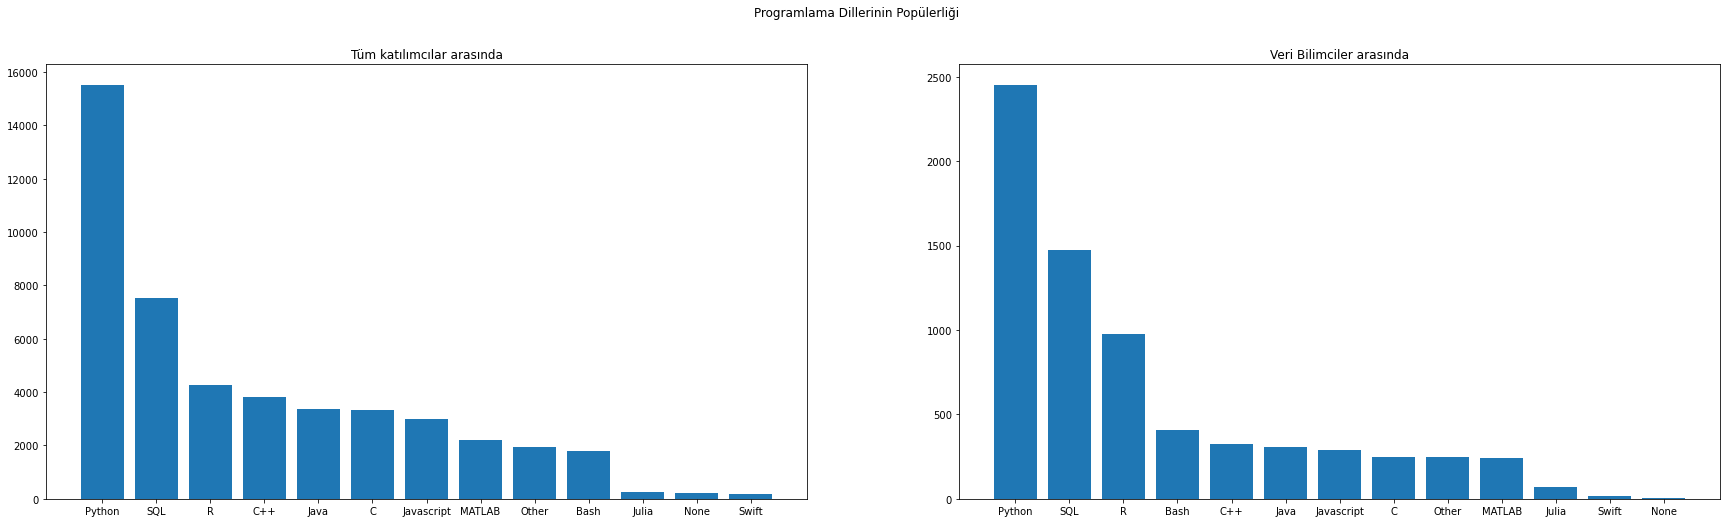

In [17]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,8))
fig.suptitle('Programlama Dillerinin Popülerliği')
ax1.set_title('Tüm katılımcılar arasında')
ax1.bar(q5_section1.index, q5_section1)
ax2.set_title('Veri Bilimciler arasında')
ax2.bar(q5_section2.index, q5_section2);

## Soru 6:
Yatay eksende ***makine öğrenmesi metotları*** deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

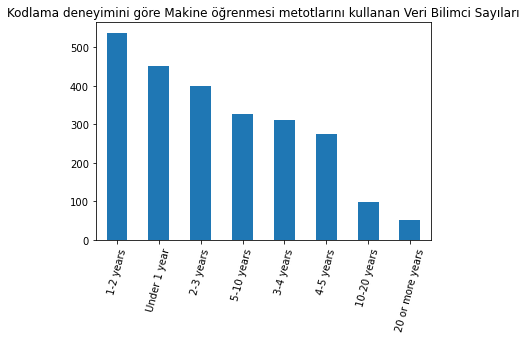

In [18]:
q6 = survey[survey['Occupation'] == 'Data Scientist'][['Coding Experience', 'Q15']]
q6 = q6[q6['Q15'] != 'I do not use machine learning methods']
q6['Q15'].value_counts().plot(kind='bar', title='Kodlama deneyimini göre Makine öğrenmesi metotlarını kullanan Veri Bilimci Sayıları', rot=75);

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [19]:
q7 = survey[survey.loc[:, 'Q16_Part_2':'Q16_OTHER'].isna().all(axis=1)].dropna(subset=['Q16_Part_1']).filter(regex='^Q(16|17)')

In [20]:
q7_OnlyML = q7.filter(like='Q17')
q7_OnlyML.columns = q7_OnlyML.apply(pd.Series.mode).iloc[0]
q7_OnlyML.count().sort_values(ascending=False)

0
Linear or Logistic Regression                          1683
Decision Trees or Random Forests                       1292
Bayesian Approaches                                     428
Gradient Boosting Machines (xgboost, lightgbm, etc)     295
Convolutional Neural Networks                           138
None                                                    105
Dense Neural Networks (MLPs, etc)                        68
Recurrent Neural Networks                                67
Other                                                    60
Evolutionary Approaches                                  38
Transformer Networks (BERT, gpt-3, etc)                  20
Generative Adversarial Networks                           8
dtype: int64

In [21]:
q7_scikitTensorKeras = survey[['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3']].dropna()
print(f'Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı: {q7_scikitTensorKeras.shape[0]}')

Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı: 4406


## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [22]:
survey = survey.reset_index(drop=True)
calculating_converted_comp = survey.Q24.fillna('0')

In [23]:
calculating_converted_comp = calculating_converted_comp.apply(lambda x: x.lstrip('>'))
calculating_converted_comp = calculating_converted_comp.apply(lambda x: x.lstrip()) 
calculating_converted_comp = calculating_converted_comp.apply(lambda x: x.lstrip('$'))
calculating_converted_comp = calculating_converted_comp.apply(lambda x: x.replace('-', ' '))
calculating_converted_comp = calculating_converted_comp.apply(lambda x: x.replace(',', ''))

In [24]:
calculated_converted_comp = calculating_converted_comp.apply(lambda x: (int(x.split()[0]) + int(x.split()[1])) / 2 if ' ' in x else int(x) )

In [25]:
survey['ConvertedComp'] = calculated_converted_comp

In [26]:
import numpy as np
q8_section1 = survey.groupby('Occupation')['ConvertedComp'].agg(np.mean).sort_values(ascending=False)
top_occupation = q8_section1.index[0]
rank_of_dataScience = list(q8_section1.index).index('Data Scientist') + 1
print(f'Ortalama yıllık maaşı en yüksek olan meslek: {top_occupation} \nData Scientist {rank_of_dataScience}. sıradadır')

Ortalama yıllık maaşı en yüksek olan meslek: Product/Project Manager 
Data Scientist 2. sıradadır


In [27]:
q8_section2 = survey[survey['Occupation'] == 'Data Scientist'].groupby('Country')['ConvertedComp'].agg(np.mean)
q8_section2.sort_values(ascending=False).head(10)

Country
United States of America                                133053.034794
Israel                                                  107672.615385
Switzerland                                              94666.233333
Australia                                                93887.062500
United Kingdom of Great Britain and Northern Ireland     87345.500000
Thailand                                                 73707.875000
Canada                                                   71758.609091
United Arab Emirates                                     70999.500000
Germany                                                  69965.321918
Ireland                                                  65416.250000
Name: ConvertedComp, dtype: float64

In [28]:
q8_section3 = survey[(survey['Q20'] == '10,000 or more employees') | (survey['Q20'] == '1000-9,999 employees') | (survey['Q20'] == '250-999 employees')]
q8_section3.groupby('Q20')['ConvertedComp'].agg(np.mean)

Q20
10,000 or more employees    58935.192583
1000-9,999 employees        52492.935109
250-999 employees           46612.876479
Name: ConvertedComp, dtype: float64

In [29]:
q8_section4 = pd.DataFrame(survey.groupby('Country')['ConvertedComp'].agg(['mean', 'std', 'median']).sort_values(by='mean',ascending=False))
q8_section4

,mean,std,median
Country,,,
Switzerland,84742.294118,71715.394325,103749.5
United States of America,81794.449382,89852.257085,74999.5
Israel,76352.923913,98722.115464,54999.5
United Kingdom of Great Britain and Northern Ireland,60356.336820,76054.178390,44999.5
Australia,57881.961883,70463.750432,44999.5
Netherlands,53544.922819,45183.612200,54999.5
United Arab Emirates,51034.094828,57332.194897,17499.5
Canada,50226.384483,56956.229303,44999.5
Germany,49217.685379,63355.209610,44999.5


In [30]:
rank_of_turkey = list(q8_section4.index).index('Turkey') + 1
values_of_turkey = q8_section4.loc['Turkey']
print(f'Türkiye {rank_of_turkey}. sıradadır. \nDeğerleri;\n{values_of_turkey}')

Türkiye 42. sıradadır. 
Değerleri;
mean       8605.333851
std       32446.616059
median      499.500000
Name: Turkey, dtype: float64


## Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

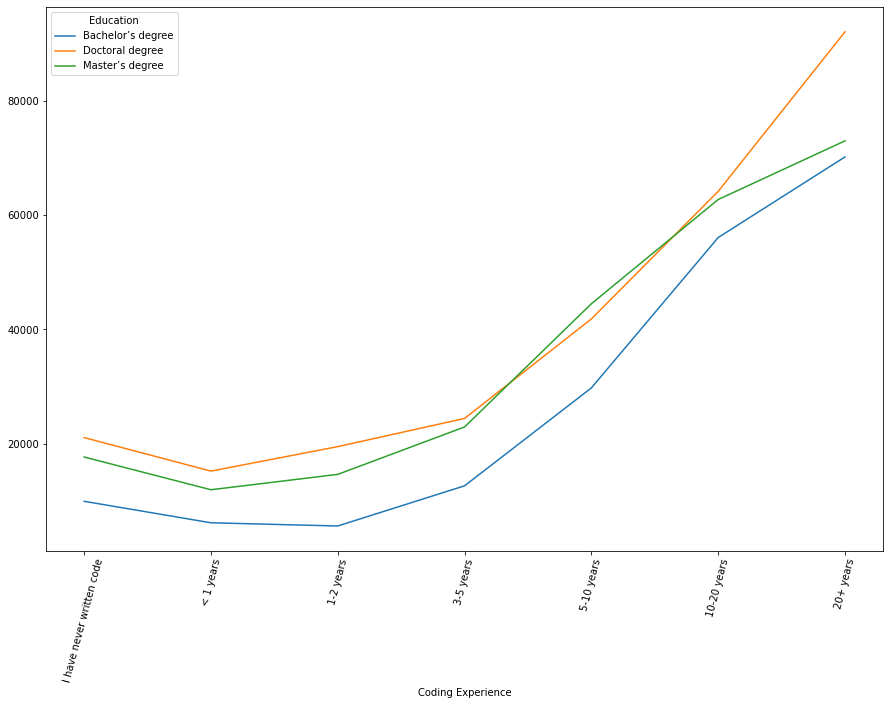

In [31]:
q9 = survey[(survey['Education'] == 'Bachelor’s degree') | (survey['Education'] == 'Master’s degree') | (survey['Education'] == 'Doctoral degree')]
q9['Coding Experience'] = q9['Coding Experience'].astype('category').cat.reorder_categories(['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'])
q9.groupby(['Coding Experience', 'Education'])['ConvertedComp'].agg(np.mean).unstack().plot(kind='line', figsize=(15,10), rot=75);

## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

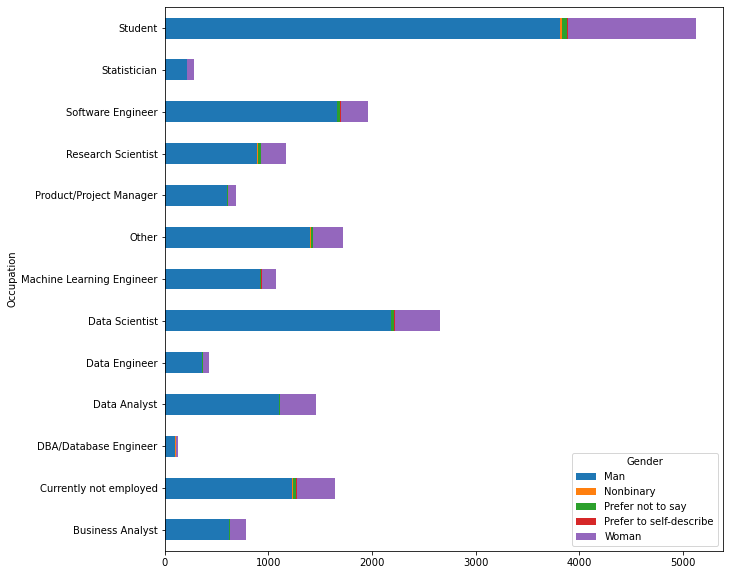

In [32]:
survey.groupby('Occupation').Gender.value_counts().unstack().plot(kind='barh', stacked=True, figsize=(10,10));

In [33]:
q10_section2 = survey[['Occupation', 'Gender']]
q10_section2.groupby('Occupation')['Gender'].value_counts(normalize=True).unstack()['Woman']

Occupation
Business Analyst             0.193384
Currently not employed       0.226748
DBA/Database Engineer        0.128000
Data Analyst                 0.235415
Data Engineer                0.138889
Data Scientist               0.164347
Machine Learning Engineer    0.126168
Other                        0.168023
Product/Project Manager      0.113703
Research Scientist           0.203085
Software Engineer            0.132721
Statistician                 0.236934
Student                      0.240296
Name: Woman, dtype: float64

In [34]:
q10_section3 = q10_section2
q10_section3 = q10_section3.groupby('Gender')['Occupation'].value_counts(normalize=True).unstack()
q10_section3['Currently not employed']

Gender
Man                        0.081529
Nonbinary                  0.085106
Prefer not to say          0.123967
Prefer to self-describe    0.134615
Woman                      0.101359
Name: Currently not employed, dtype: float64

## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

In [35]:
q11 = survey[survey['Gender'] == 'Woman']
q11 = q11[(q11['Coding Experience'] != 'I have never written code') & (q11['Coding Experience'] != '< 1 years') & (q11['Coding Experience'] != '1-2 years')]

In [36]:
most_woman = q11.groupby('Country')['Gender'].count().sort_values(ascending=False).index[0]
print(f'Kadın katılımcı sayısının en yüksek olduğu ülke: {most_woman}')

Kadın katılımcı sayısının en yüksek olduğu ülke: India


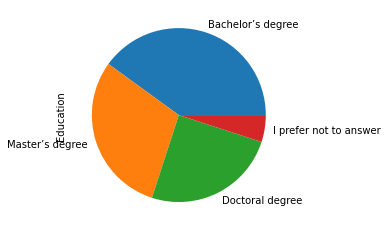

In [37]:
q11_only_turkey = q11[q11['Country'] == 'Turkey']['Education']
q11_only_turkey.value_counts().plot(kind='pie');

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [38]:
cols = ['Q39_Part_1', 'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6', 'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_Part_10', 'Q39_Part_11', 'Q39_OTHER']
survey.loc[:, cols] = survey.filter(like='Q39').apply(lambda x: x.str.replace(r"\(.*\)",""))
survey.filter(like='Q39')

,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,Journal Publications,NaN,NaN,NaN
1,Twitter,NaN,Reddit,Kaggle,Course Forums,YouTube,NaN,Blogs,NaN,Slack Communities,NaN,NaN
2,NaN,Email newsletters,NaN,Kaggle,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19115,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
19116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19118,Twitter,NaN,NaN,Kaggle,NaN,YouTube,NaN,Blogs,NaN,NaN,NaN,NaN


In [39]:
q12 = survey[survey['Age'] == '18-21'].filter(like='Q39')
q12.columns = q12.apply(pd.Series.mode).iloc[0]
fav_socMed = q12.count().sort_values(ascending=False).index[0]
print(f'18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu: {fav_socMed}')

18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu: Kaggle 


## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [40]:
country_info = pd.read_csv(r'countryinfo.txt', index_col='Country', skiprows=49, sep='\t', usecols=["#ISO", "Country", "neighbours"])
country_info.rename(columns={'#ISO':'Country Code'}, inplace=True)
merged_survey = survey.merge(country_info, how='left', on='Country')
merged_survey

,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,ConvertedComp,Country Code,neighbours
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,0.0,CO,"EC,PE,PA,BR,VE"
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112499.5,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,17499.5,AR,"CL,BO,UY,PY,BR"
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137499.5,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,JP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,None,NaN,17499.5,TH,"LA,MM,KH,MY"
19116,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,NaN,NaN
19117,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499.5,BR,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR"
19118,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,...,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,499.5,IN,"CN,NP,MM,BT,PK,BD"


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [43]:
q14_codes = merged_survey[merged_survey['Country']=='Germany']['neighbours'].iloc[0] + ',DE'
q14 = merged_survey[merged_survey['Country Code'].isin(q14_codes.split(','))]
q14_group = q14.groupby('Country')['Education'].value_counts(normalize=True).unstack()
q14_group.sort_values(by='Country')['Doctoral degree']

Country
Belgium        0.220339
France         0.239617
Germany        0.258486
Netherlands    0.154362
Poland         0.151724
Switzerland    0.323529
Name: Doctoral degree, dtype: float64